# **Brent Oil Price Change Point Analysis**

In [1]:
# 📊 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
# 🛠️ Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# 🖥️ Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
# 📚 Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor 

# 📏 Set figure size for visualizations
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [5]:
# 📂 Set the local path for loading the dataset
file_path = '../data/BrentOilPrices.csv'
print("📥 Loading data from:", file_path)

📥 Loading data from: ../data/BrentOilPrices.csv


In [6]:
data= pd.read_csv(file_path)
print(data.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [7]:
print(data.tail(10))

              Date  Price
9001  Nov 01, 2022  95.12
9002  Nov 02, 2022  96.07
9003  Nov 03, 2022  95.29
9004  Nov 04, 2022  99.53
9005  Nov 07, 2022  99.87
9006  Nov 08, 2022  96.85
9007  Nov 09, 2022  93.05
9008  Nov 10, 2022  94.25
9009  Nov 11, 2022  96.37
9010  Nov 14, 2022  93.59


In [8]:
# ⚙️ Setup the data preprocessor class
processor = DataPreprocessor(file_path)

# 🚀 Load the data
try:
    oil_price_data = processor.load_data()
    print("✅ Data loaded successfully! Here's a preview:")
    print(oil_price_data.head())
except Exception as e:
    print("❌ An error occurred while loading the data:", e)

d:\KAIM\Brent-Oil-Price-Change-Point-Analysis\scripts\data_preprocessing.py:82: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data["Date"] = pd.to_datetime(


✅ Data loaded successfully! Here's a preview:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [9]:
oil_price_data.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [10]:
oil_price_data.tail(10)

,Date,Price
9001,2022-11-01,95.12
9002,2022-11-02,96.07
9003,2022-11-03,95.29
9004,2022-11-04,99.53
9005,2022-11-07,99.87
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37
9010,2022-11-14,93.59


In [11]:
# 🚀 Inspect the data
processor.inspect(oil_price_data)
print("✅ Data inspected successfully!")

### 📏 **Dimensions (rows, columns):** (9011, 2)

### 📊 **Data Types:**

Date     datetime64[ns]
Price           float64
dtype: object

### ❓ **Missing Values:**

**No missing values found. ✅**

### 🔍 **Unique Values in Each Column:**

Date     9011
Price    5015
dtype: int64

### 🚨 **Number of Duplicate Rows: 0**

### 📈 **Summary Statistics for Numeric Columns:**

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


### 🔗 **Correlation Matrix:**

,Date,Price
Date,1.000000,0.720816
Price,0.720816,1.000000


### 🚫 **Outlier Counts in Each Numeric Column:**

Series([], dtype: int64)

✅ Data inspected successfully!


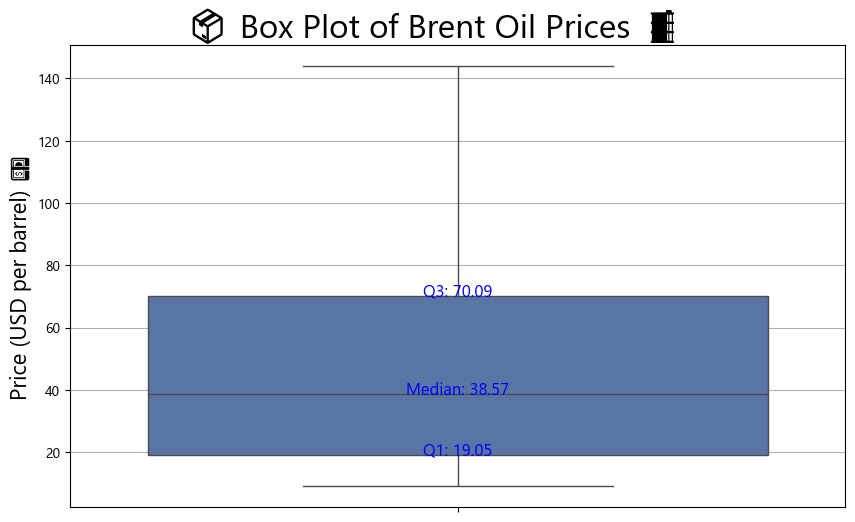

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font to one that supports emojis
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Segoe UI Emoji", "DejaVu Sans"]

plt.figure(figsize=(10, 6))

# Create the box plot
box_plot = sns.boxplot(data=oil_price_data, y="Price", color="#4C72B0")

# Add grid lines
plt.grid(axis="y")

# Add title and labels
plt.title("📦 Box Plot of Brent Oil Prices 🛢️", fontsize=24, fontweight='bold')
plt.ylabel("Price (USD per barrel) 💵", fontsize=16)

# Annotate the box plot with median and quartiles
median = oil_price_data["Price"].median()
q1 = oil_price_data["Price"].quantile(0.25)
q3 = oil_price_data["Price"].quantile(0.75)

# Add text annotations
plt.text(0, median, f'Median: {median:.2f}', horizontalalignment='center', color='blue', fontsize=12)
plt.text(0, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='blue', fontsize=12)
plt.text(0, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='blue', fontsize=12)

plt.show()

### **Exploratory Data Analysis**

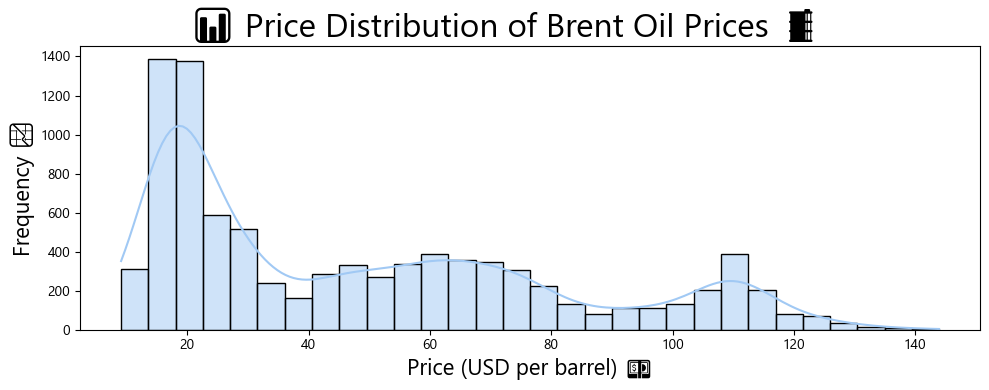

In [13]:
# Set the pastel color palette
sns.set_palette('pastel')

# Create the histogram with KDE
plt.figure(figsize=(10, 4))
sns.histplot(oil_price_data['Price'], bins=30, kde=True)

# Add title and labels with emojis
plt.title('📊 Price Distribution of Brent Oil Prices 🛢️', fontsize=24, fontweight='bold')
plt.xlabel('Price (USD per barrel) 💵', fontsize=16)
plt.ylabel('Frequency 📈', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

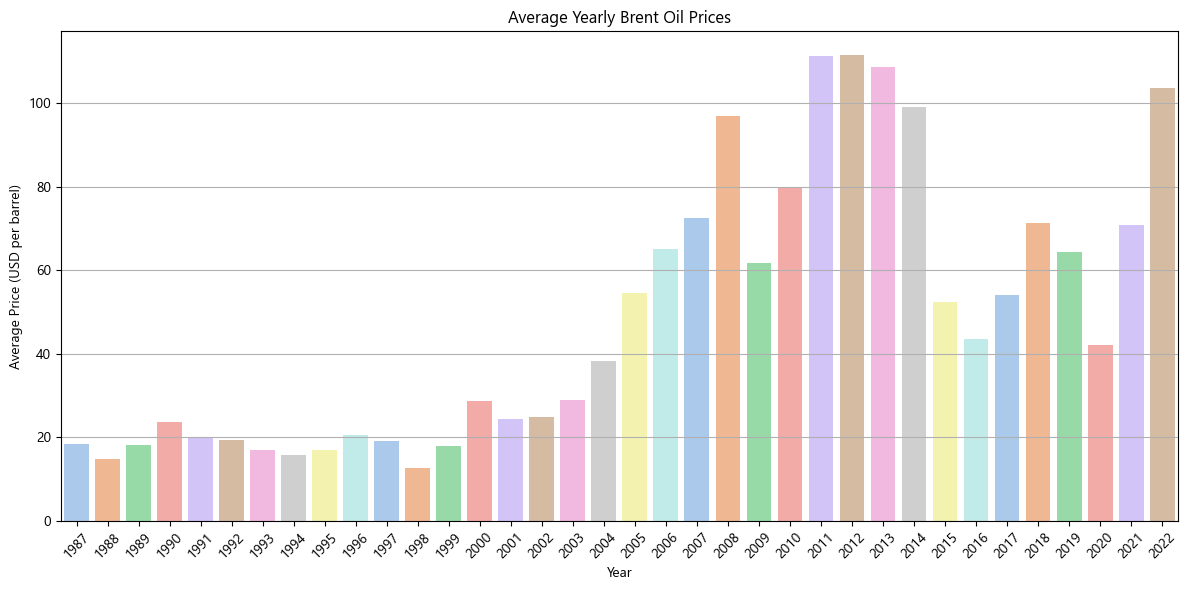

In [14]:
from data_visualizer import DataVisualizer

# Create an instance of DataVisualizer (no need to pass logger)
visualizer = DataVisualizer(oil_price_data)

# Visualize Yearly plot
visualizer.plot_yearly_average()

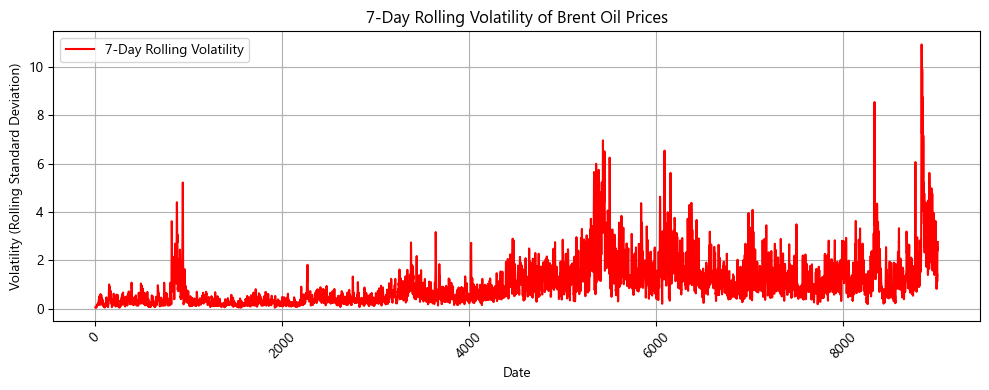

In [15]:
# 7-Day volatile
visualizer.plot_rolling_volatility(7)

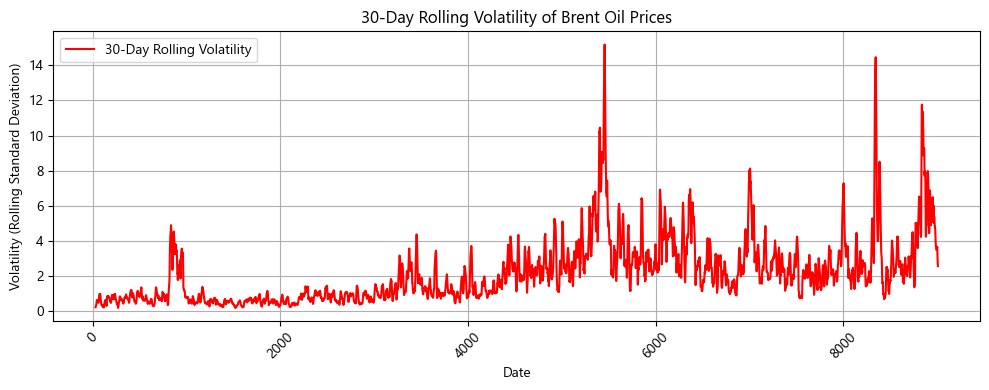

In [16]:
# 30-Day Volatile
visualizer.plot_rolling_volatility(30)

### **Seasonal Decomposition**

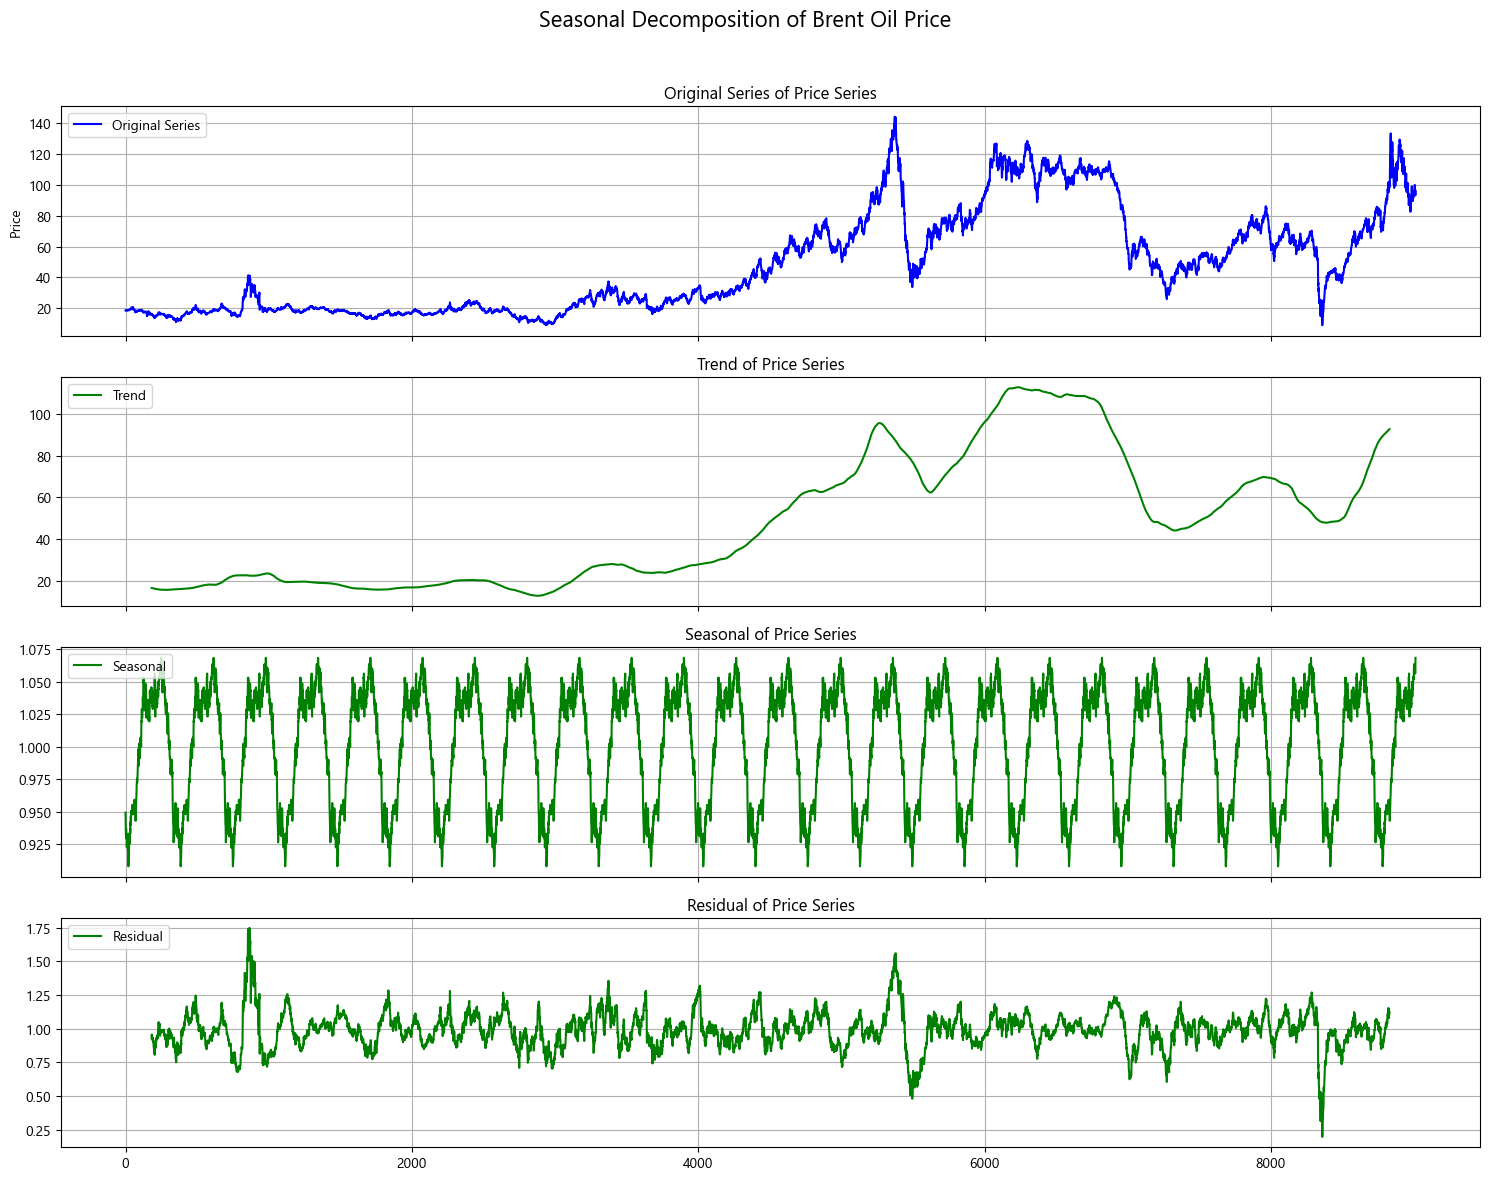

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition (use model='multiplicative' for data with proportional seasonal effects)
result = seasonal_decompose(oil_price_data['Price'], model='multiplicative', period=365)  # Adjust period if necessary

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
components = ['Original Series', 'Trend', 'Seasonal', 'Residual']
series = [oil_price_data['Price'], result.trend, result.seasonal, result.resid]

for ax, comp, ser in zip(axes, components, series):
    ax.plot(oil_price_data.index, ser, label=comp, color='b' if comp == 'Original Series' else 'green')
    ax.set_title(f'{comp} of Price Series')
    ax.set_ylabel('Price' if comp == 'Original Series' else '')
    ax.grid(True)
    ax.legend(loc='upper left')

# Improve layout and display the plot
fig.suptitle('Seasonal Decomposition of Brent Oil Price', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
plt.show()

Stationaly Analysis of Time Series Data

Apply the Augmented Dickey-Fuller (ADF) Test

ADF Statistic: -11.250179655838968
p-value: 1.7197844570683132e-20
Critical Values:
   1%: -3.431079878822629
   5%: -2.8618625589084705
   10%: -2.566941693085751
The ADF test suggests the series is stationary.


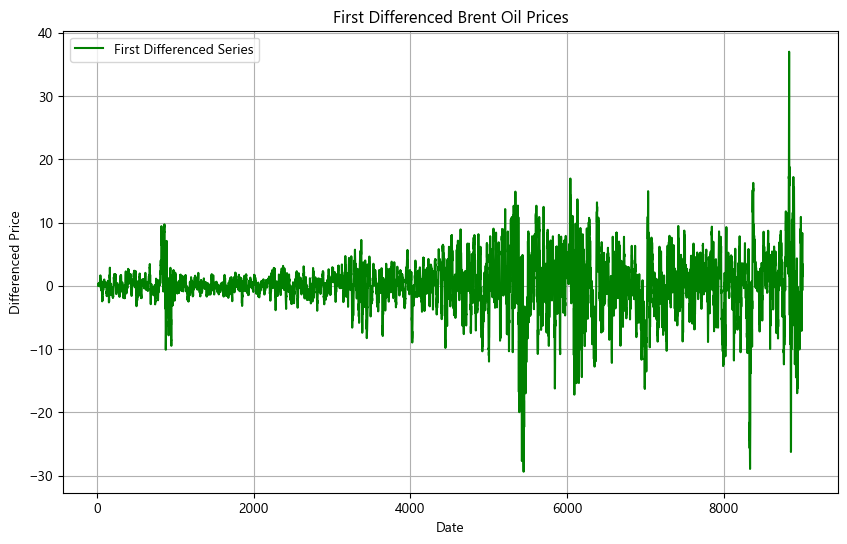

(np.float64(-11.250179655838968), np.float64(1.7197844570683132e-20))

In [28]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(series, title, label, alpha=0.05):
    adf_result = adfuller(series)
    
    # Print ADF results
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')
    
    # Interpretation
    if adf_result[1] < alpha:
        print("The ADF test suggests the series is stationary.")
    else:
        print("The ADF test suggests the series is not stationary.")

    # Plot the differenced series
    plt.figure(figsize=(10, 6))
    plt.plot(series, label=label,color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Differenced Price')
    plt.legend()
    plt.grid()
    plt.show()
    
    return adf_result[0], adf_result[1]  # Returning ADF statistic and p-value for further use

# Assuming 'price_data' is your DataFrame with a 'Price' column
data = oil_price_data['Price']

# First differencing
data_diff = data.diff(12).dropna()
test_stationarity(data_diff, title='First Differenced Brent Oil Prices', label='First Differenced Series')

ADF Statistic: -16.42711349448589
p-value: 2.4985801611428892e-29
Critical Values:
   1%: -3.4310783342658615
   5%: -2.861861876398633
   10%: -2.566941329781918
The ADF test suggests the series is stationary.


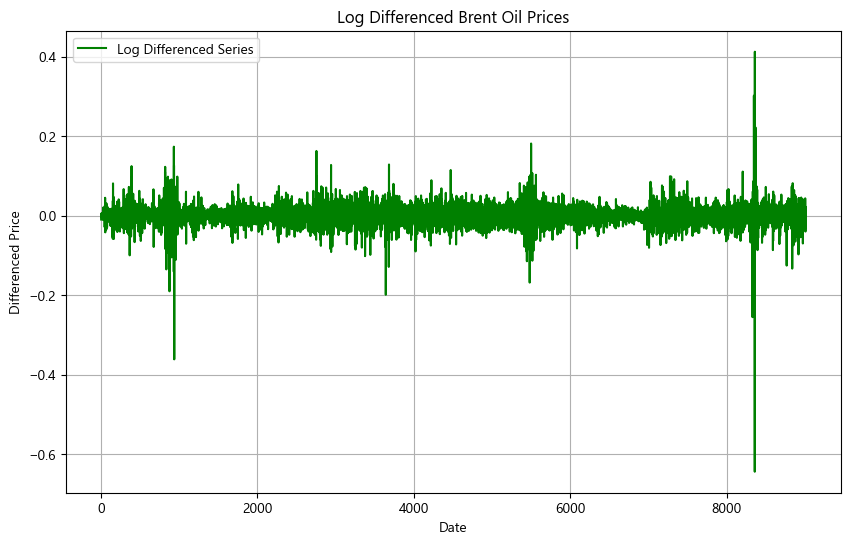

(np.float64(-16.42711349448589), np.float64(2.4985801611428892e-29))

In [19]:
# Log transformation
log_data = np.log(oil_price_data['Price'])
log_data_diff = log_data.diff().dropna()
test_stationarity(log_data_diff, title='Log Differenced Brent Oil Prices', label='Log Differenced Series')

### **Create Event datasets**

In [20]:
# Define the events dictionary
events_dict = {
    "Gulf War (1990-1991)": {"start": "1990-08-02", "end": "1991-02-28"},
    "September 11 Attacks (2001)": {"start": "2001-09-11", "end": "2001-09-11"},
    "2003 Invasion of Iraq": {"start": "2003-03-20", "end": "2011-12-18"},
    "2008 Financial Crisis": {"start": "2008-09-15", "end": "2009-07-01"},
    "Arab Spring (2010-2012)": {"start": "2010-12-18", "end": "2012-12-18"},
    "Libyan Civil War (2011)": {"start": "2011-02-15", "end": "2011-10-23"},
    "U.S. Shale Oil Boom (2010s)": {"start": "2010-01-01", "end": "2019-12-31"},
    "OPEC Production Cuts (2016-2017)": {"start": "2016-11-30", "end": "2017-06-30"},
    "Iran Nuclear Deal and Sanctions (2015-2018)": {"start": "2015-07-14", "end": "2018-05-07"},
    "COVID-19 Pandemic (2020)": {"start": "2020-03-11", "end": "2022-09-30"},
    "OPEC+ Response to COVID-19 (2020)": {"start": "2020-04-09", "end": "2020-12-31"},
    "Russia-Ukraine Conflict (2022)": {"start": "2022-02-24", "end": "2022-09-30"},
    "Global Economic Recovery (2021-2022)": {"start": "2021-01-01", "end": "2022-09-30"}
}

# Convert the events dictionary to a DataFrame
events_data = pd.DataFrame.from_dict(events_dict, orient='index')
events_data.reset_index(inplace=True)
events_data.columns = ['Event', 'Start', 'End']

# Convert Start and End to datetime
events_data['Start'] = pd.to_datetime(events_data['Start'])
events_data['End'] = pd.to_datetime(events_data['End'])

In [21]:
events_data

,Event,Start,End
0,Gulf War (1990-1991),1990-08-02,1991-02-28
1,September 11 Attacks (2001),2001-09-11,2001-09-11
2,2003 Invasion of Iraq,2003-03-20,2011-12-18
3,2008 Financial Crisis,2008-09-15,2009-07-01
4,Arab Spring (2010-2012),2010-12-18,2012-12-18
5,Libyan Civil War (2011),2011-02-15,2011-10-23
6,U.S. Shale Oil Boom (2010s),2010-01-01,2019-12-31
7,OPEC Production Cuts (2016-2017),2016-11-30,2017-06-30
8,Iran Nuclear Deal and Sanctions (2015-2018),2015-07-14,2018-05-07
9,COVID-19 Pandemic (2020),2020-03-11,2022-09-30


### **Merge Event Data with Oil_Price Data**

In [22]:
def merge_event(
    events_data: pd.DataFrame, oil_price_data: pd.DataFrame
) -> pd.DataFrame:
    # Ensure Date, Start, and End columns are in datetime format
    oil_price_data["Date"] = pd.to_datetime(oil_price_data["Date"])
    events_data["Start"] = pd.to_datetime(events_data["Start"])
    events_data["End"] = pd.to_datetime(events_data["End"])

    # Create a DataFrame that contains each price date with corresponding events
    events_expanded = pd.DataFrame(
        {
            "Date": pd.date_range(
                start=events_data["Start"].min(), end=events_data["End"].max(), freq="D"
            )
        }
    )

    # Merge the expanded events data with events_data to assign event names
    merged_data = pd.merge_asof(
        events_expanded.sort_values("Date"),
        events_data.sort_values("Start"),
        left_on="Date",
        right_on="Start",
        direction="backward",
    )

    # Merge the price data with the merged event data
    oil_price_data = oil_price_data.merge(
        merged_data[["Date", "Event"]], on="Date", how="left"
    )

    # Fill the 'Event' column with 'No Event' where there is no match
    oil_price_data["Event"] = oil_price_data["Event"].fillna("No Event")

    return oil_price_data


# Apply the function to merge events to each price date
oil_price_data = merge_event(events_data, oil_price_data)

In [23]:
oil_price_data.iloc[8011:8021]

,Date,Price,Rolling_Volatility,Event
8011,2018-12-07,61.71,5.959597,OPEC Production Cuts (2016-2017)
8012,2018-12-10,60.29,5.540082,OPEC Production Cuts (2016-2017)
8013,2018-12-11,59.73,5.193258,OPEC Production Cuts (2016-2017)
8014,2018-12-12,59.94,4.825738,OPEC Production Cuts (2016-2017)
8015,2018-12-13,59.03,4.667241,OPEC Production Cuts (2016-2017)
8016,2018-12-14,58.56,4.488270,OPEC Production Cuts (2016-2017)
8017,2018-12-17,57.59,4.169263,OPEC Production Cuts (2016-2017)
8018,2018-12-18,55.26,4.043119,OPEC Production Cuts (2016-2017)
8019,2018-12-19,55.60,3.869386,OPEC Production Cuts (2016-2017)
8020,2018-12-20,52.84,3.853889,OPEC Production Cuts (2016-2017)


### **Event Distributions:**

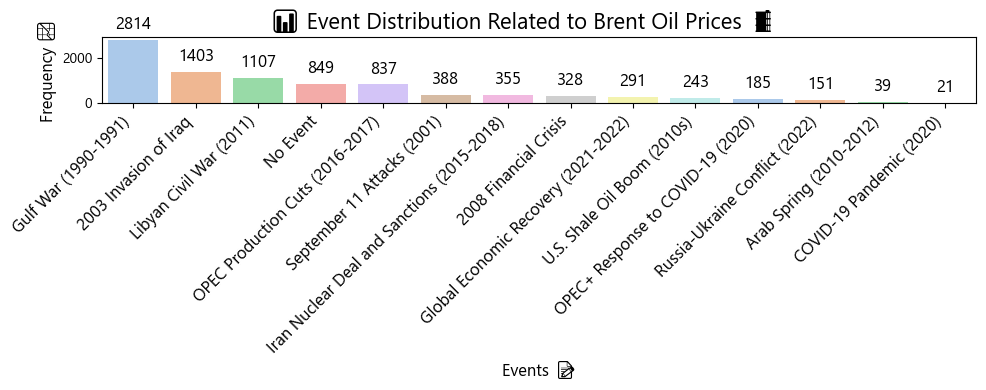

In [24]:
# Assuming 'Event' is the column containing the names of the events in oil_price_data
event_counts = oil_price_data['Event'].value_counts()

# Create a DataFrame for the counts to use with hue
event_counts_df = event_counts.reset_index()
event_counts_df.columns = ['Event', 'Frequency']

# Create the bar plot
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(data=event_counts_df, x='Event', y='Frequency', hue='Event', palette="pastel", errorbar=None, legend=False)

# Add title and labels with emojis
plt.title('📊 Event Distribution Related to Brent Oil Prices 🛢️', fontsize=16, fontweight='bold')
plt.xlabel('Events 📝', fontsize=12)
plt.ylabel('Frequency 📈', fontsize=12)

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout to make room for rotated labels
plt.tight_layout()

# Show the plot
plt.show()

### **Plot Time Series Data:**
+ Create a line graph to visualize price trends over time.


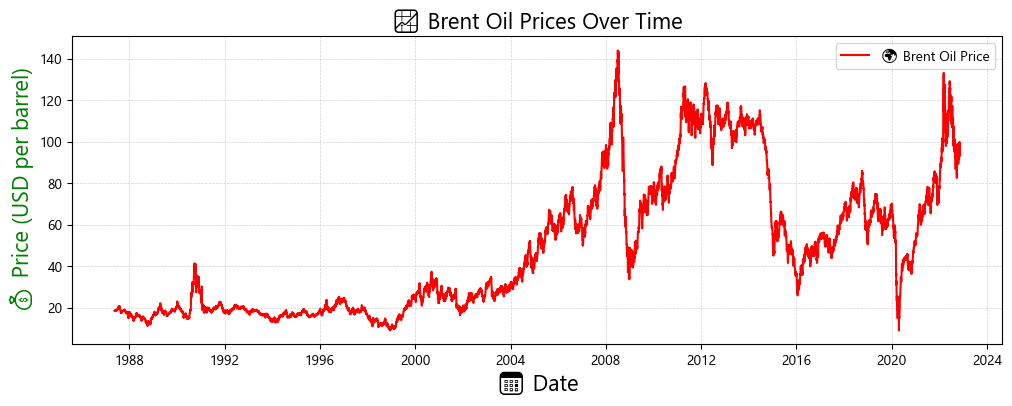

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(
    oil_price_data["Date"],
    oil_price_data["Price"],
    label="🌍 Brent Oil Price",
    color="red",
)
plt.title("📈 Brent Oil Prices Over Time", fontsize=16, color="black")
plt.xlabel("📅 Date", fontsize=16, color="black")
plt.ylabel("💰 Price (USD per barrel)", fontsize=16, color="green")
plt.legend()
plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
plt.show()

### **Analysis Seasonality**

+ Aggregate prices by year and visualize seasonal patterns.

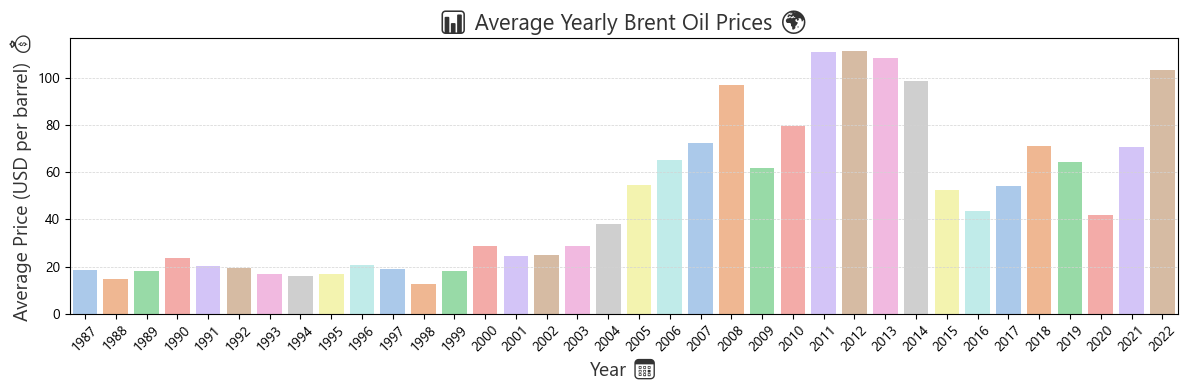

In [26]:
oil_price_data['Year'] = oil_price_data['Date'].dt.year

# Calculate average price per year
yearly_avg = oil_price_data.groupby('Year')['Price'].mean().reset_index()

# Plot yearly average prices
plt.figure(figsize=(12, 4))
sns.barplot(x='Year', y='Price', data=yearly_avg, hue='Year', legend=False, palette='pastel')
plt.title('📊 Average Yearly Brent Oil Prices 🌍', fontsize=16, color='#333333')
plt.xlabel('Year 📅', fontsize=14, color='#333333')
plt.ylabel('Average Price (USD per barrel) 💰', fontsize=14, color='#333333')
plt.xticks(rotation=45)
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### **Scatter Plots for Price Fluctuations:**
+ Generate scatter plots to observe price fluctuations associated with specific events.

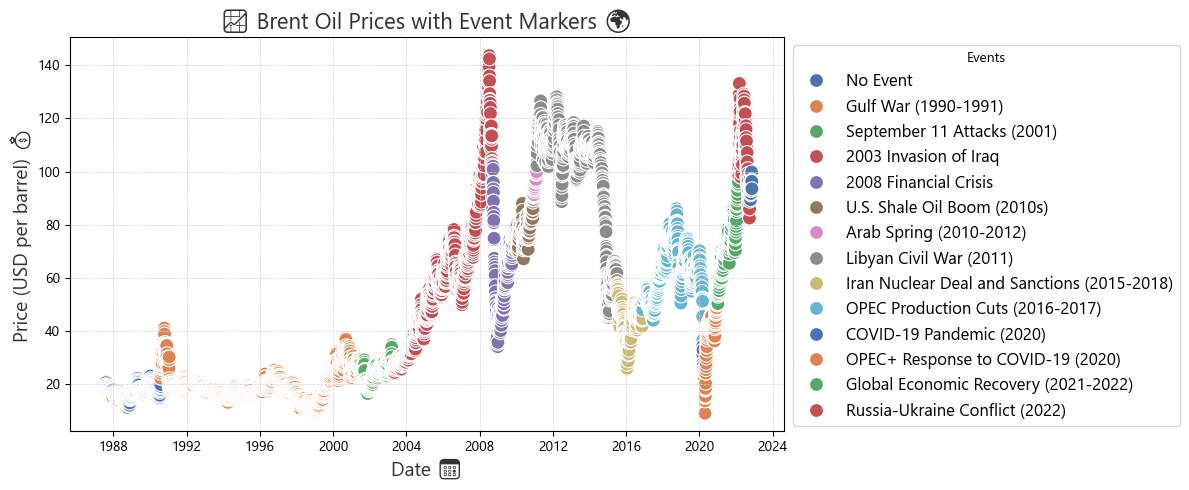

In [27]:
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x="Date", y="Price", hue="Event", data=oil_price_data, palette="deep", s=100
)
plt.title("📈 Brent Oil Prices with Event Markers 🌍", fontsize=16, color="#333333")
plt.xlabel("Date 📅", fontsize=14, color="#333333")
plt.ylabel("Price (USD per barrel) 💰", fontsize=14, color="#333333")

# Adjust the legend position
plt.legend(title="Events", fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()